### Demo notebook to add a parcellation on top of the surface

In [5]:
# import libraries
import os, sys
from matplotlib_surface_plotting import plot_surf
import nibabel as nb
import numpy as np


In [6]:
#load vertices and overlay vectors
vertices, faces=nb.freesurfer.io.read_geometry('../data/lh.inflated')
overlay = nb.freesurfer.io.read_morph_data('../data/lh.thickness')


In [7]:
#optional masking of medial wall
cortex=nb.freesurfer.io.read_label('../data/lh.cortex.label')
mask=np.ones_like(overlay).astype(bool)
mask[cortex]=0
overlay[mask]=np.min(overlay)

In [9]:
#load parcellation, e.g: Desikan-Kiliany atlas and colors labels
atlas= nb.freesurfer.io.read_annot('../data/lh.aparc.annot')[0]
rois=list(set(atlas))                #
colors = np.random.rand(len(rois),4)
label_atlas= dict(zip(rois, colors))  #colors for each labels (optional)

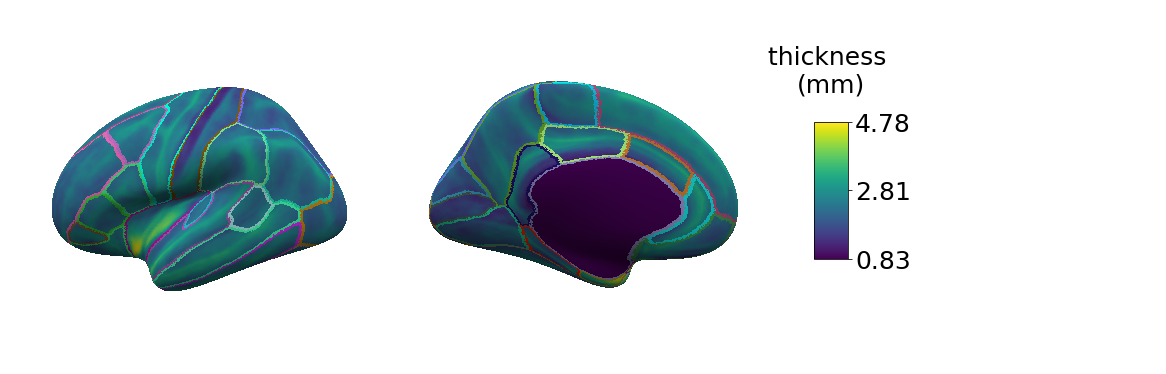

In [10]:
plot_surf(vertices, faces, overlay, rotate=[90,270], filename='demo_plot.png',
          vmax = np.max(overlay[cortex]),vmin=np.min(overlay[cortex]),
#           mask=mask,
          pvals=np.ones_like(overlay), cmap_label='thickness \n(mm)',
          parcel=atlas, parcel_cmap=label_atlas
         )